# Consistency bookkeeping

In this notebook, we check the consistency between the old and new bookkeepings

## Read Pedersen21 postprocessing

Using old and new code

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from lace.emulator import pnd_archive, p1d_archive
import numpy as np
import matplotlib.pyplot as plt

#### Old

In [2]:
# by default it would drop tau rescalings (these were not used in Pedersen et al. 2021, 2023)
archive_old = p1d_archive.archiveP1D(basedir='/lace/emulator/sim_suites/Australia20/',drop_tau_rescalings=False)
len(archive_old.data)

990

#### New

In [3]:
archive_new = pnd_archive.archivePND(sim_suite="Pedersen21")
print(len(archive_new.data))

# in the old bookkeeping, data from average
archive_new.average_over_samples(flag="all")
print(len(archive_new.data_av_all))

1980
990


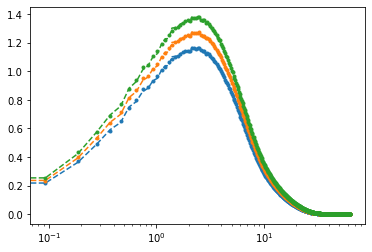

In [4]:
for ii in range(3):
    col = 'C'+str(ii)
    k = archive_old.data[ii]['k_Mpc']
    pk = archive_old.data[ii]['p1d_Mpc']
    plt.plot(k, k*pk, col+'.')
    
    k = archive_new.data[ii]['k_Mpc']
    pk = archive_new.data[ii]['p1d_Mpc']
    plt.plot(k, k*pk, col+'--')
plt.xscale('log')